In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
%matplotlib inline

### Helper functions

In [2]:
# Loading data and transforming it to pandas dataframe
def load_data(path, col_name):
    data = sio.loadmat(path)
    data = pd.DataFrame(data['Y'])
    return data

In [3]:
# Getting the values and plotting it
def plotCluster(Y, x1, x2):
    f1 = np.ravel(Y[x1, :])
    f2 = np.ravel(Y[x2, :])
    plt.scatter(f1, f2, c='blue', s=7)
    plt.show()

In [4]:
# Normalizes the data to get the mean to 0
def normalize_mean(Y):
    mu = Y.mean(0)
    Y = Y - mu
    return Y

### PCA 

In [5]:
def pca(Y, d):
    Y = Y.T

    # Normalize mean
    Y = normalize_mean(Y)

    # Find the correlation matrix
    C = (Y.T * Y) / Y.shape[0]

    # Do eigenvalue decomposition get the
    # eigenvalues(W) and eigenvectors(V) of 
    # covariance matrix
    W, V = np.linalg.eig(C)

    # Extract the top-d eigenvectors
    V = V[:, 0:d]
    
    # Represent data in this basis
    X = Y * V
    
    # Calculate the mean of low-dimensional space
    M_X = np.sum(X, axis=0) / X.shape[0]
    
    return V.T, M_X, X.T

### Kernel PCA 

In [6]:
def kernel_pca(K, d):
    
    # Initialize a column vector of 1's with
    # N rows
    ones = np.matrix(np.ones(K.shape[0])).T
    
    # Initialize a N x N identity matrix
    I = np.identity(K.shape[0])
    
    # Calculate (I - (1 * 1.T) / N)
    partial = I - ((ones * ones.T) / K.shape[0])
    
    # Compute K hat
    K_hat = partial * K * partial
    
    # Do eigenvalue decomposition and get hold of 
    # the eigenvalues (W) and eigenvectors (V) of 
    # covariance matrix
    W, V = np.linalg.eig(K_hat)
    
    # Extract the top-d eigenvectors
    V = V[:, 0:d]
    
    # Represent data in this low-dimensional 
    # basis and return it
    return (K_hat * V).T

In [7]:
def main():
    data = load_data("HW3_Data/dataset1.mat", 'Y')
    Y = np.matrix(data.values)
    K = np.dot(Y.T, Y)
    U, mean, X_pca = pca(Y, 2)
    X_kpca = kernel_pca(K, 2)
    print(Y.shape)
#     print("PCA")
#     print("Basis of low-dim subspace: ")
#     print(U)
#     print("Mean of subspace: ")
#     print(mean)
#     print("Low-dim representation: ")
#     print(X_pca)
#     print()
#     print("KERNEL PCA")
#     print("Low-dim representation: ")
#     print(X_kpca)
    
    #plotting original data representation 1st and 2nd feature
    plotCluster(Y, 0, 1)
    #plotting original data representation 2st and 3rd feature
    plotCluster(Y, 1, 2)
    #plotting original data representation after PCA
    plotCluster(X_pca, 0, 1)
    plotCluster(X_kpca, 0, 1)

(40, 200)


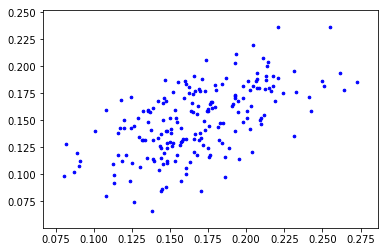

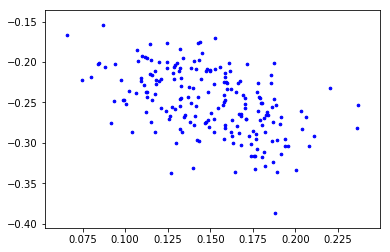

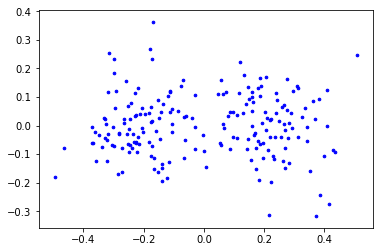

/Users/siddhantbenadikar/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


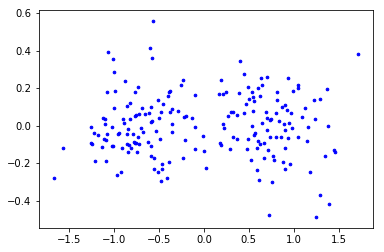

In [8]:
if __name__ == '__main__':
    main()